# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ---- 1 Define the problem ----

Write the problem in your own words here
Examine a set of job postings that are paired with their respective salaries and use this to predict salaries for a new set of job postings

In [3]:
#import your libraries
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

#your info here
__author__ = "Anslin Dieujuste"
__email__ = "anslind@gmail.com"

## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [4]:
#load the data into a Pandas dataframe
train_salary = pd.read_csv("train_salaries.csv")
train_features = pd.read_csv("train_features.csv")
test_features = pd.read_csv("test_features.csv")

### ---- 3 Clean the data ----

In [5]:
#look for duplicate data, invalid data (e.g. salaries <=0), or corrupt data and remove it
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [6]:
train_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
jobId     1000000 non-null object
salary    1000000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


## Checking the size and shape of each dataset

In [7]:
train_salary.shape

(1000000, 2)

In [8]:
train_features.shape

(1000000, 8)

In [9]:
train_salary.size

2000000

In [10]:
train_features.size

8000000

## Checking for duplicates

In [11]:
train_salary.duplicated().sum()

0

In [12]:
train_features.duplicated().sum()

0

## Checking for any null values

In [13]:
train_salary.isnull().any()

jobId     False
salary    False
dtype: bool

In [14]:
train_features.isnull().any()

jobId                  False
companyId              False
jobType                False
degree                 False
major                  False
industry               False
yearsExperience        False
milesFromMetropolis    False
dtype: bool

## A peak of the first ten rows for each dataset

In [15]:
train_salary.head(10)

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163
5,JOB1362684407692,113
6,JOB1362684407693,178
7,JOB1362684407694,73
8,JOB1362684407695,31
9,JOB1362684407696,104


In [16]:
train_features.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68


### ---- 4 Explore the data (EDA) ----

In [17]:
#summarize each feature variable
#summarize the target variable
#look for correlation between each feature and the target
#look for correlation between features

## Summary of Numerical Values

In [18]:
train_features.describe()

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,11.992386,49.529260
std,7.212391,28.877733
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


In [19]:
train_features.describe(include=[np.number])

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,11.992386,49.529260
std,7.212391,28.877733
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


In [20]:
train_salary.describe()

,salary
count,1000000.000000
mean,116.061818
std,38.717936
min,0.000000
25%,88.000000
50%,114.000000
75%,141.000000
max,301.000000


In [21]:
train_features.describe(include=['O'])

,jobId,companyId,jobType,degree,major,industry
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,1000000,63,8,5,9,7
top,JOB1362685181139,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236976,532355,143206


## Summary of each feature from training feature dataset

In [22]:
train_features.companyId.value_counts()

COMP39    16193
COMP35    16114
COMP59    16066
COMP30    16041
COMP3     16028
COMP40    16008
COMP51    16005
COMP44    16005
COMP9     15988
COMP56    15979
COMP54    15977
COMP46    15967
COMP58    15961
COMP32    15958
COMP19    15958
COMP18    15957
COMP13    15956
COMP43    15955
COMP21    15949
COMP42    15944
COMP62    15943
COMP25    15932
COMP48    15930
COMP23    15918
COMP4     15918
COMP20    15910
COMP10    15909
COMP14    15908
COMP22    15907
COMP37    15905
          ...  
COMP41    15859
COMP45    15850
COMP6     15837
COMP24    15831
COMP61    15822
COMP1     15820
COMP38    15819
COMP34    15810
COMP33    15801
COMP60    15799
COMP5     15798
COMP47    15796
COMP28    15794
COMP50    15791
COMP12    15783
COMP16    15783
COMP49    15779
COMP53    15776
COMP27    15773
COMP55    15767
COMP7     15767
COMP31    15756
COMP29    15754
COMP26    15750
COMP52    15737
COMP17    15715
COMP0     15666
COMP2     15641
COMP8     15638
COMP57    15635
Name: companyId, Length:

In [23]:
train_features.jobType.value_counts()

SENIOR            125886
VICE_PRESIDENT    125235
MANAGER           125121
CTO               125046
JANITOR           124971
CEO               124778
JUNIOR            124594
CFO               124369
Name: jobType, dtype: int64

In [24]:
train_features.degree.value_counts()

HIGH_SCHOOL    236976
NONE           236854
BACHELORS      175495
DOCTORAL       175364
MASTERS        175311
Name: degree, dtype: int64

In [25]:
train_features.industry.value_counts()

WEB          143206
AUTO         142943
FINANCE      142867
EDUCATION    142819
OIL          142771
HEALTH       142755
SERVICE      142639
Name: industry, dtype: int64

In [26]:
train_features.major.value_counts()

NONE           532355
CHEMISTRY       58875
LITERATURE      58684
ENGINEERING     58596
BUSINESS        58518
PHYSICS         58410
COMPSCI         58382
BIOLOGY         58379
MATH            57801
Name: major, dtype: int64

## Merge training datasets

In [27]:
# Merge training sets for the salaries and features
train_df = pd.merge(train_features, train_salary, on = 'jobId')
train_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [28]:
train_df.describe(include='all')

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
count,1000000,1000000,1000000,1000000,1000000,1000000,1000000.000000,1000000.000000,1000000.000000
unique,1000000,63,8,5,9,7,NaN,NaN,NaN
top,JOB1362685181139,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB,NaN,NaN,NaN
freq,1,16193,125886,236976,532355,143206,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,11.992386,49.529260,116.061818
std,NaN,NaN,NaN,NaN,NaN,NaN,7.212391,28.877733,38.717936
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,25.000000,88.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,50.000000,114.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,75.000000,141.000000


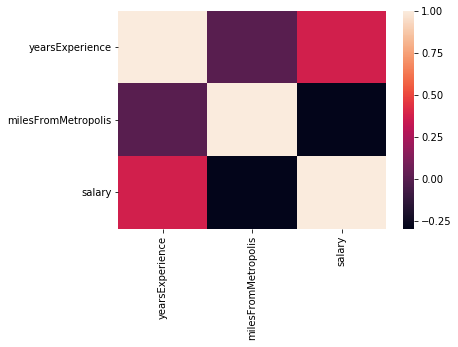

In [29]:
# Checking for any correlation

corr = train_df.corr()

sns.heatmap(corr,
           xticklabels= corr.columns.values,
           yticklabels= corr.columns.values)

In [30]:
corr

,yearsExperience,milesFromMetropolis,salary
yearsExperience,1.000000,0.000673,0.375013
milesFromMetropolis,0.000673,1.000000,-0.297666
salary,0.375013,-0.297666,1.000000


## Visualize the target variable

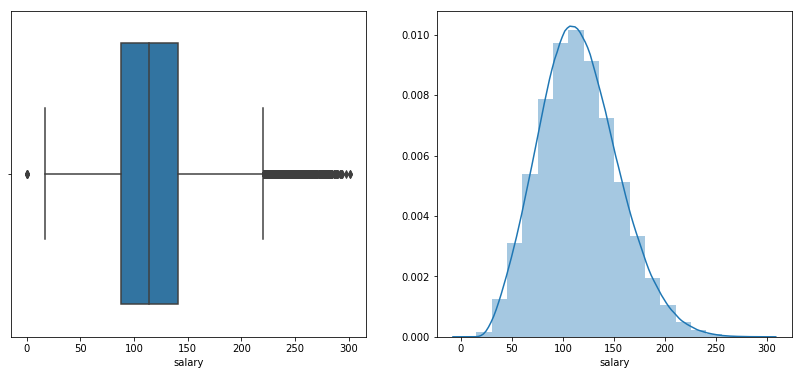

In [31]:
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.boxplot(train_df['salary'])
plt.subplot(1,2,2)
sns.distplot(train_df.salary, bins=20)
plt.show()

### Althought our distribution plot show that the target varible is normally distributed, our boxplot shows that we have possible outliers.  Let's do some investigating using IQR.

In [32]:
salary_stats=train_df.salary.describe()
print(salary_stats)
IQR = salary_stats['75%'] - salary_stats['25%']
Upper = salary_stats['75%'] + 1.5 * IQR
Lower = salary_stats['25%'] - 1.5 * IQR
print('\n The Upper and Lower bounds for the suspected outliers are {} and {}.'.format(Upper, Lower))

count    1000000.000000
mean         116.061818
std           38.717936
min            0.000000
25%           88.000000
50%          114.000000
75%          141.000000
max          301.000000
Name: salary, dtype: float64

 The Upper and Lower bounds for the suspected outliers are 220.5 and 8.5.


In [33]:
train_df[train_df.salary < 8.5]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


In [34]:
train_df.loc[train_df.salary > 220.5, 'jobType'].value_counts()

CEO               3227
CFO               1496
CTO               1488
VICE_PRESIDENT     603
MANAGER            217
SENIOR              66
JUNIOR              20
Name: jobType, dtype: int64

In [35]:
train_df[(train_df.salary > 220.5) & (train_df.jobType == 'JUNIOR')]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
189582,JOB1362684597269,COMP32,JUNIOR,DOCTORAL,BUSINESS,OIL,24,11,221
214606,JOB1362684622293,COMP47,JUNIOR,MASTERS,BUSINESS,FINANCE,22,4,222
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
427593,JOB1362684835280,COMP54,JUNIOR,DOCTORAL,ENGINEERING,FINANCE,23,3,221


Based on our analysis it appears that the salaries that were less than $8.5 don't make any sense and may be due to data that is missing.  There is also a very small amount that falls in this area so we will be removing it from our data.

For the salaries above $220.5 and have the jobType of JUNIOR this seems to be fine when we take the consideration of the degree, industry, and years of experience the person has.

In [36]:
print("Dropping rows with salary values less than 8.5")
train_df = train_df[train_df.salary > 8.5]
train_df.shape

Dropping rows with salary values less than 8.5


(999995, 9)

In [53]:
train_df.groupby('jobType').head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,115.345049,135.458547,130.505647,133.322042,115.735540,10,83,130
1,JOB1362684407688,115.756548,145.311425,101.921085,102.583864,121.645362,3,73,101
2,JOB1362684407689,116.224249,125.368630,135.490979,130.372436,115.735540,10,38,137
3,JOB1362684407690,116.199380,115.368518,135.490979,129.072085,109.435222,8,17,142
4,JOB1362684407691,115.888501,125.368630,125.454663,130.372436,130.747659,8,16,163
5,JOB1362684407692,115.847117,115.368518,135.490979,132.075605,130.747659,2,31,113
6,JOB1362684407693,115.847117,135.458547,98.176882,102.583864,115.735540,23,24,178
7,JOB1362684407694,116.176489,95.333087,125.454663,129.072085,99.448386,9,70,73
8,JOB1362684407695,115.934192,70.813045,101.921085,102.583864,99.448386,1,54,31
9,JOB1362684407696,116.515543,125.368630,125.454663,129.072085,109.435222,17,68,104


In [37]:
def plot_feature(df, col):
    '''
    This will create a plot for any feature
    Left, shows the distribution of the samples on the feature
    Right, shows how the feature depends on salary
    
    '''
    plt.figure(figsize=(14, 6))
    plt.subplot(1,2,1)
    
    if df[col].dtype == 'int64':
        df[col].value_counts().sort_index().plot()
    else:
        mean = df.groupby(col)['salary'].mean()
        df[col] = df[col].astype('category')
        levels = mean.sort_values().index.tolist()
        df[col].cat.reorder_categories(levels, inplace=True)
        df[col].value_counts().plot()
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Counts')
    
        
    plt.subplot(1,2,2)
    if df[col].dtype == 'int64' or col == 'companyId':
        mean = df.groupby(col)['salary'].mean()
        std = df.groupby(col)['salary'].std()
        mean.plot()
        plt.fill_between(range(len(std.index)), mean.values-std.values, mean.values+std.values, \
                        alpha = 0.1)
        
    else:
        sns.boxplot(x=col, y='salary', data=df)
    
        plt.xticks(rotation = 45)
    
    plt.ylabel('Salary')
    plt.show()

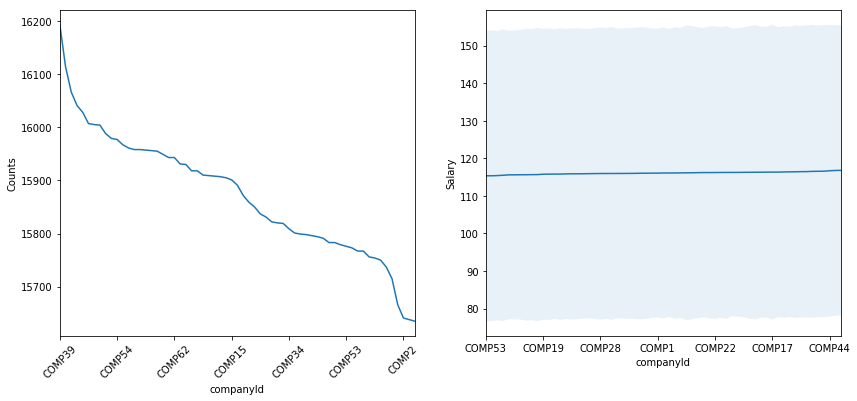

In [38]:
plot_feature(train_df, 'companyId')

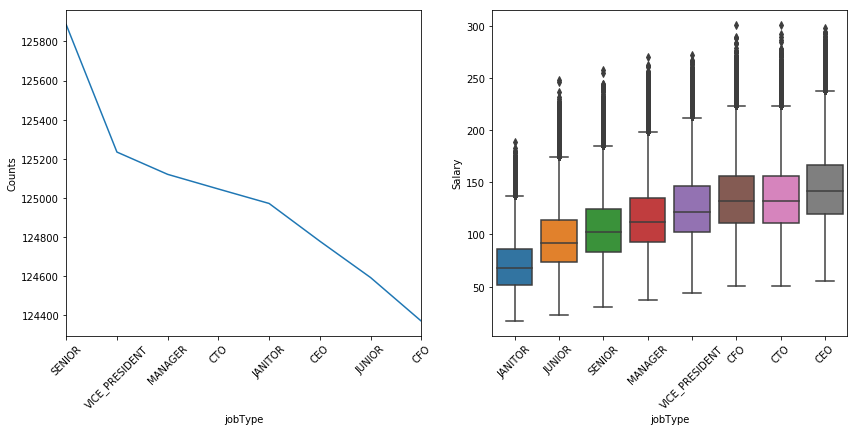

In [39]:
plot_feature(train_df, 'jobType')

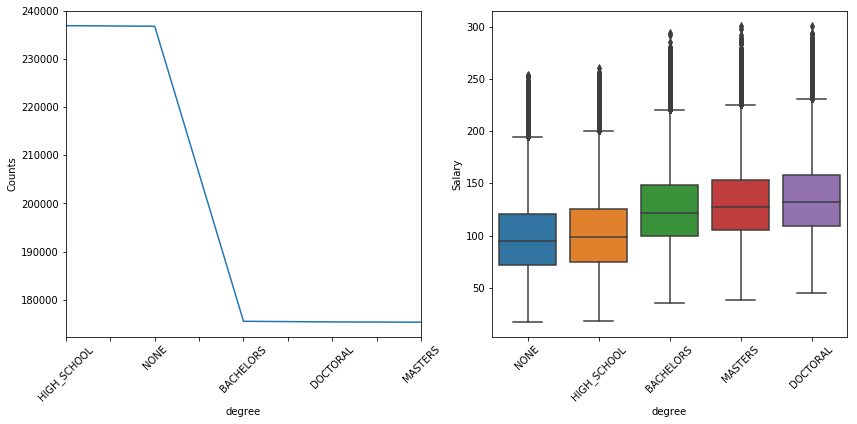

In [40]:
plot_feature(train_df, 'degree')

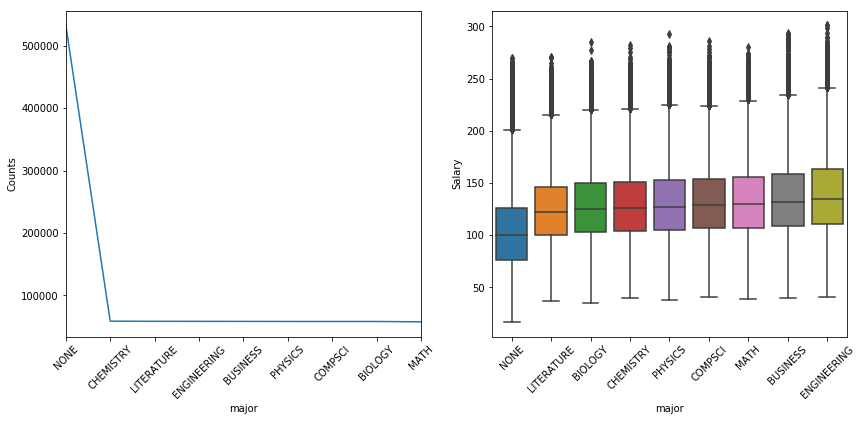

In [41]:
plot_feature(train_df, 'major')

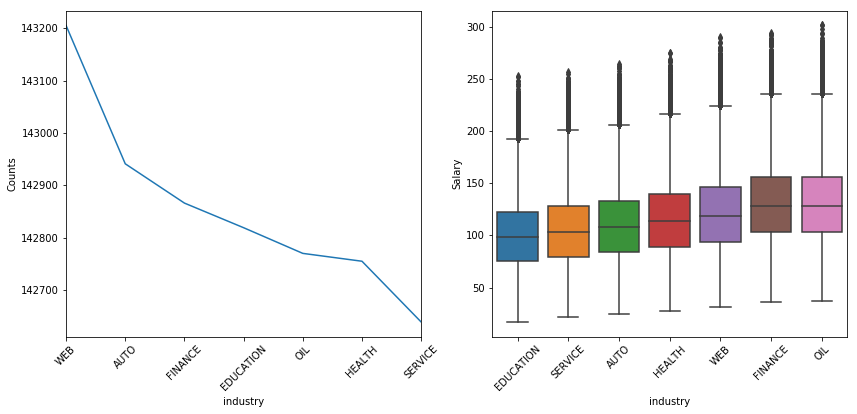

In [42]:
plot_feature(train_df, 'industry')

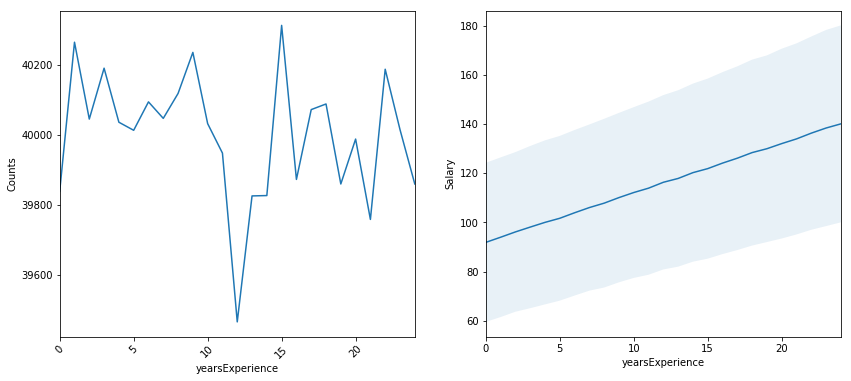

In [43]:
plot_feature(train_df, 'yearsExperience')

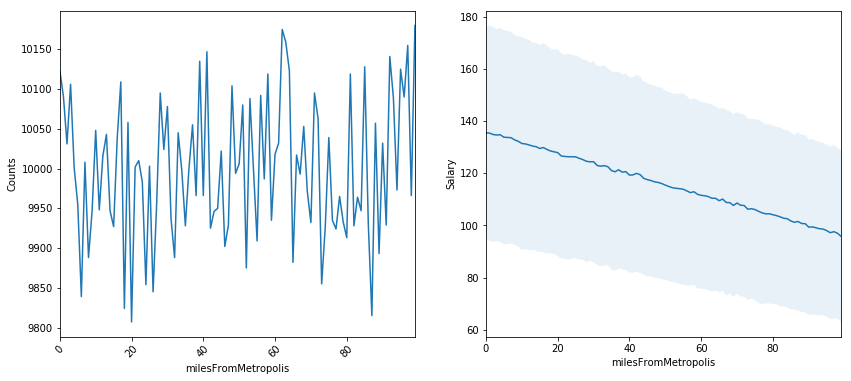

In [44]:
plot_feature(train_df, 'milesFromMetropolis')

In [45]:
def encode_label(df, col):
    cat_dict = {}
    cats = df[col].cat.categories.tolist()
    for cat in cats:
        cat_dict[cat] = train_df[train_df[col]==cat]['salary'].mean()
    df[col] = df[col].map(cat_dict)

In [46]:
for col in train_df.columns:
    if train_df[col].dtype.name == 'category':
        encode_label(train_df, col)

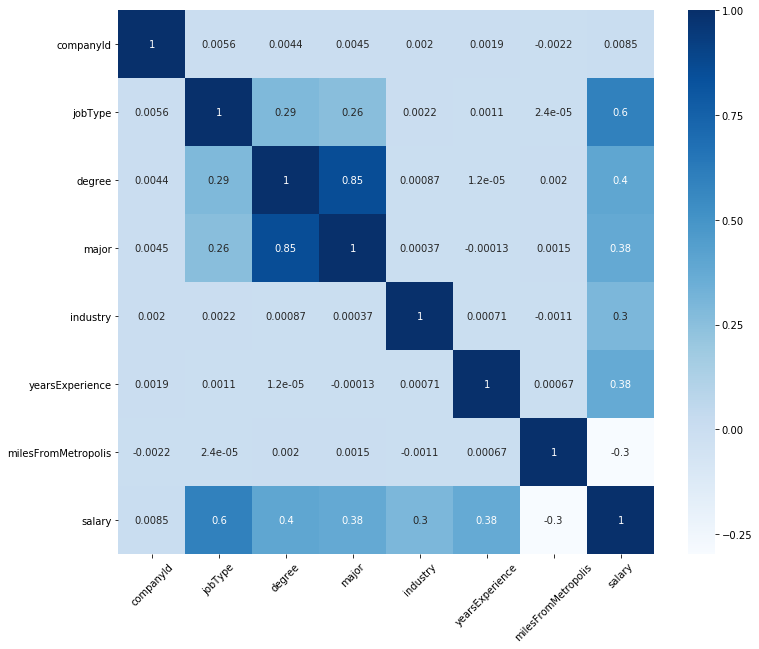

In [47]:
fig = plt.figure(figsize=(12,10))
features = ['companyId', 'jobType', 'degree', 'major', 'industry', 'yearsExperience', 'milesFromMetropolis']
sns.heatmap(train_df[features + ['salary']].corr(), cmap='Blues', annot=True)
plt.xticks(rotation=45)
plt.show()

In [112]:
#num_col = ['yearsExperience', 'milesFromMetropolis', 'salary']
#cat_col = ['companyId','jobType', 'degree', 'major', 'industry']


### ---- 5 Establish a baseline ----

In [48]:
#select a reasonable metric (MSE in this case)
#create an extremely simple model and measure its efficacy
#e.g. use "average salary" for each industry as your model and then measure MSE
#during 5-fold cross-validation

# Linear Regression Baseline model

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [97]:
y = train_df['salary']
X = train_df.drop(['jobId','salary'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

In [98]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.734865700640599

In [108]:
preds = lr.predict(X_test)
print('The MSE for the baseline Linear Regression model is', mean_squared_error(y_test, preds))

The MSE for the baseline Linear Regression model is 398.94663197817414


# Random Forest Regressor Baseline model

In [75]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_jobs=-1)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)


/home/anslind/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.712246207144642

In [107]:
pred = rf.predict(X_test)
print('The MSE for the baseline Random Forest Regressor model is', mean_squared_error(y_test, pred))

The MSE for the baseline Random Forest Regressor model is 432.98210294163425


# KNN Baseline model

In [90]:
from sklearn.neighbors import KNeighborsRegressor
k=5
neigh = KNeighborsRegressor(n_neighbors=k)
neigh.fit(X_train, y_train)
neigh.score(X_test, y_test)

0.7136832991782016

In [106]:
pred = neigh.predict(X_test)
print('The MSE for the baseline KNN Regressor model is', mean_squared_error(y_test, pred))

The MSE for the baseline KNN Regressor model is 430.81971569857853


### ---- 6 Hypothesize solution ----

In [92]:
#brainstorm 3 models that you think may improve results over the baseline model based
#on your 

Brainstorm 3 models that you think may improve results over the baseline model based on your EDA and explain why they're reasonable solutions here.

Also write down any new features that you think you should try adding to the model based on your EDA, e.g. interaction variables, summary statistics for each group, etc

Based on the three base models I have choosen I will choose to improve my results for the Linear Regression models.  Although the score for all three models are nearly the same (between .73 and .71) the Linear Regression model has a smaller MSE, 398, compared to Random Forest and KNN which have an MSE of 432 and 430 respectively

Some thing that we may want to look it is what is the salary of some one with no degree compared to someone who has a High School diploma? or at least a Bachelors degree?

We may also want to look at if someone who is a Janitor compared to being in at least a Junior level for the Job Type

## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 7 Engineer features  ----

In [51]:
#make sure that data is ready for modeling
#create any new features needed to potentially enhance model


In [113]:
train_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,115.345049,135.458547,130.505647,133.322042,115.735540,10,83,130
1,JOB1362684407688,115.756548,145.311425,101.921085,102.583864,121.645362,3,73,101
2,JOB1362684407689,116.224249,125.368630,135.490979,130.372436,115.735540,10,38,137
3,JOB1362684407690,116.199380,115.368518,135.490979,129.072085,109.435222,8,17,142
4,JOB1362684407691,115.888501,125.368630,125.454663,130.372436,130.747659,8,16,163


### ---- 8 Create models ----

In [ ]:
#create and tune the models that you brainstormed during part 2


### ---- 9 Test models ----

In [ ]:
#do 5-fold cross validation on models and measure MSE

### ---- 10 Select best model  ----

In [ ]:
#select the model with the lowest error as your "prodcuction" model

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [ ]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

### ---- 12 Deploy solution ----

In [ ]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

### ---- 13 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data